### Problem statement
Classification: Naïve Bayes

Dataset: pima-indians-diabetes.csv

Use probabilistic approach to implement Classifier model. Evaluate the
performance of the model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [3]:
pima = pd.read_csv('../all_datasets/Decision Tree & Naive Bayes Classification/pima-indians-diabetes.csv')
pima


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Define column names based on the information you provided
column_names = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

pima.columns = column_names

pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


### Data analysis and preprocessing

In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Checking for null values
pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We have to predict whether or not the patients in the dataset have diabetes or not?

So let us check how many people have diabetes and how many of them do not

In [6]:
pima['Outcome'].value_counts()


0    500
1    267
Name: Outcome, dtype: int64

<AxesSubplot:>

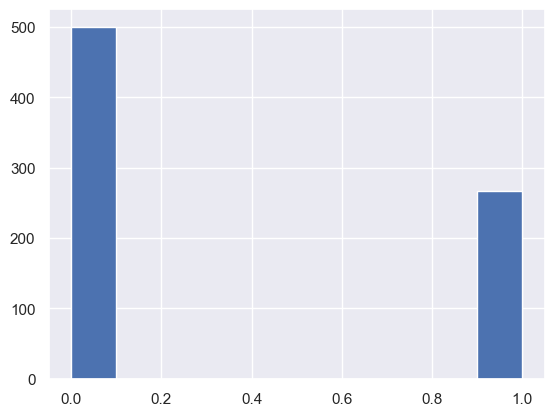

In [7]:
pima['Outcome'].hist()

In [11]:
x=pima.drop(columns=['Outcome'])
y=pima['Outcome']
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


In [13]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# Remember standardization is only applied to independant features hence we are not standardizing y values

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [17]:
model.fit(x_train, y_train)

GaussianNB()

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import classification_report, accuracy_score

In [21]:
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification report: \n{report}')
print(f'Accuracy: \n{accuracy}')

Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        97
           1       0.71      0.56      0.63        57

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 
0.7532467532467533


In [23]:
from sklearn.metrics import roc_curve, auc

In [24]:
y_score = model.predict_proba(x_test)[:, -1]

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

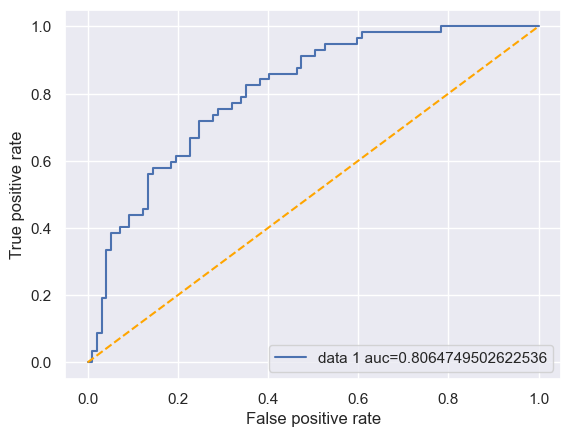

In [30]:
plt.plot(fpr, tpr, label="data 1 auc="+str(roc_auc))
plt.plot([0,1],[0,1], color="orange", linestyle="--")
plt.legend(loc=4)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

In [37]:
from sklearn.metrics import accuracy_score

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(y_score>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head(5)

,thresholds,accuracy
19,0.499171,0.753247
20,0.498224,0.746753
18,0.503076,0.746753
28,0.247970,0.733766
23,0.443986,0.733766
